## Demo: Forcasting Stock Performance in Our Portfolio

This program retrieves stock price data using the Alpaca API and then simulates future performance using Monte Carlo Simulation.

### Import Dependencies

In [12]:
# Import libraries and dependencies
import os
import pandas as pd
import requests
import json 
from dotenv import load_dotenv
import alpaca_trade_api as trade_api
from MCForecastTools import MCSimulation 

%matplotlib inline

In [13]:
# Load .env enviroment variables
load_dotenv()

True

In [14]:
# Set Alpaca API key and secret
alpaca_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_API_SECRET_KEY")

print(f"Your alpaca key is: {type(alpaca_key)}")
print(f"Your alpaca secret key is: {type(alpaca_secret_key)}")

api = trade_api.REST(alpaca_key, alpaca_secret_key, api_version="V2")

Your alpaca key is: <class 'str'>
Your alpaca secret key is: <class 'str'>


### Get Past 3 Year's Worth of Microsoft and Coca-Cola Stock Price Data via Alpaca API Call

In [15]:
# Set timeframe to '1D'
timeframe = '1D'

# Set start and end datetimes between now and 3 years ago.
start_date = pd.Timestamp('2018-6-5', tz='America/New_York').isoformat()
end_date = pd.Timestamp("2021-5-5", tz='America/New_York').isoformat()

# Set the ticker information
tickers = ['AAPL', 'MSFT', 'GOOG', 'AMZN']

# Get 3 year's worth of historical price data for Microsoft and Coca-Cola
trade_df = api.get_barset(tickers, timeframe=timeframe, start=start_date, end=end_date).df

# Display sample data
trade_df.head(10)

AAPL                                        \
                             open     high      low    close     volume   
time                                                                      
2020-12-10 00:00:00-05:00  120.50  123.870  120.150  123.220   70011939   
2020-12-11 00:00:00-05:00  122.43  122.760  120.550  122.490   75289233   
2020-12-14 00:00:00-05:00  122.60  123.350  121.550  121.770   65119346   
2020-12-15 00:00:00-05:00  124.34  127.900  124.130  127.890  140585059   
2020-12-16 00:00:00-05:00  127.41  128.370  126.560  127.750   84637825   
2020-12-17 00:00:00-05:00  128.90  129.580  128.045  128.650   76704353   
2020-12-18 00:00:00-05:00  128.96  129.100  126.120  126.650  109773113   
2020-12-21 00:00:00-05:00  125.02  128.310  123.449  128.240   99115677   
2020-12-22 00:00:00-05:00  131.61  134.405  129.650  131.845  156846263   
2020-12-23 00:00:00-05:00  132.16  132.430  130.780  130.960   76023894   

                                AMZN                                         \
                                open       high      low     close   volume   
time                                                                          
2020-12-10 00:00:00-05:00  3088.9900  3142.1000  3076.00  3100.070  2616777   
2020-12-11 00:00:00-05:00  3096.6600  3118.6700  3072.82  3116.410  2829892   
2020-12-14 00:00:00-05:00  3143.0000  3190.4700  3126.00  3156.970  3595275   
2020-12-15 00:00:00-05:00  3181.0100  3188.5000  3130.49  3166.450  2911200   
2020-12-16 00:00:00-05:00  3176.0100  3247.0000  3163.68  3240.960  3845903   
2020-12-17 00:00:00-05:00  3250.0000  3263.5100  3221.00  3237.015  3037171   
2020-12-18 00:00:00-05:00  3243.9900  3249.4200  3171.60  3201.070  4186849   
2020-12-21 00:00:00-05:00  3200.0100  3226.9666  3166.00  3205.740  3242075   
2020-12-22 00:00:00-05:00  3202.8435  3222.0000  3180.08  3206.520  2098711   
2020-12-23 00:00:00-05:00  3205.0000  3210.1300  3184.17  3186.730  1836532   

                              GOOG                                         \
                              open       high       low    close   volume   
time                                                                        
2020-12-10 00:00:00-05:00  1769.80  1781.3100  1740.320  1774.50  1028387   
2020-12-11 00:00:00-05:00  1763.06  1784.4500  1760.000  1781.77   900235   
2020-12-14 00:00:00-05:00  1775.00  1797.3900  1757.215  1760.06  1146607   
2020-12-15 00:00:00-05:00  1764.42  1771.4200  1749.950  1767.68  1011487   
2020-12-16 00:00:00-05:00  1772.88  1773.0000  1756.080  1762.91  1087656   
2020-12-17 00:00:00-05:00  1768.51  1771.7836  1738.660  1747.98  1220762   
2020-12-18 00:00:00-05:00  1754.18  1755.1100  1720.220  1723.35  1961611   
2020-12-21 00:00:00-05:00  1713.51  1740.8500  1699.000  1740.37  1094805   
2020-12-22 00:00:00-05:00  1734.43  1737.4050  1712.575  1724.65   781644   
2020-12-23 00:00:00-05:00  1728.11  1747.9900  1725.040  1731.43   719523   

                              MSFT                                         
                              open      high       low    close    volume  
time                                                                       
2020-12-10 00:00:00-05:00  211.770  213.0800  210.3600  210.515  21350370  
2020-12-11 00:00:00-05:00  210.050  213.3200  209.1100  213.270  25404751  
2020-12-14 00:00:00-05:00  213.100  216.2100  212.8800  214.190  22719582  
2020-12-15 00:00:00-05:00  215.165  215.4200  212.2400  214.160  20310863  
2020-12-16 00:00:00-05:00  214.750  220.1100  214.7200  219.190  28250581  
2020-12-17 00:00:00-05:00  219.870  220.8900  217.9200  219.420  24306195  
2020-12-18 00:00:00-05:00  218.590  219.6900  216.0200  218.150  31957813  
2020-12-21 00:00:00-05:00  217.550  224.0000  217.2801  222.570  29644731  
2020-12-22 00:00:00-05:00  222.690  225.6300  221.8500  223.970  19271948  
2020-12-23 00:00:00-05:00  223.110  223.5589  220.8000  221.020  15366146

### The MCForecastTools Library at a Glance

In [16]:
# Print the documentation of the MCSimulation module of the MCForecastTools library
?MCSimulation

Init signature:
MCSimulation(
    ['portfolio_data', "weights=''", 'num_simulation=1000', 'num_trading_days=252'],
)
Docstring:     
A Python class for runnning Monte Carlo simulation on portfolio price data. 

...

Attributes
----------
portfolio_data : pandas.DataFrame
    portfolio dataframe
weights: list(float)
    portfolio investment breakdown
nSim: int
    number of samples in simulation
nTrading: int
    number of trading days to simulate
simulated_return : pandas.DataFrame
    Simulated data from Monte Carlo
confidence_interval : pandas.Series
    the 95% confidence intervals for simulated final cumulative returns
    
Init docstring:
Constructs all the necessary attributes for the MCSimulation object.

Parameters
----------
portfolio_data: pandas.DataFrame
    DataFrame containing stock price information from Alpaca API
weights: list(float)
    A list fractions representing percentage of total investment per stock. DEFAULT: Equal distribution
num_simulation: int
    Number of

### Simulate five year portfolio growth using Monte Carlo simulation

In [17]:
# Configuring a Monte Carlo simulation to forecast five years cumulative returns
weights = [0.25, 0.25, 0.25, 0.25]
five_years = 252*5 

MC_fiveyear = MCSimulation(portfolio_data=trade_df, weights=weights, num_simulation=500, num_trading_days=five_years)

In [18]:
# Printing the simulation input data
MC_fiveyear.portfolio_data.head()

AAPL                                     \
                             open    high     low   close     volume   
time                                                                   
2020-12-10 00:00:00-05:00  120.50  123.87  120.15  123.22   70011939   
2020-12-11 00:00:00-05:00  122.43  122.76  120.55  122.49   75289233   
2020-12-14 00:00:00-05:00  122.60  123.35  121.55  121.77   65119346   
2020-12-15 00:00:00-05:00  124.34  127.90  124.13  127.89  140585059   
2020-12-16 00:00:00-05:00  127.41  128.37  126.56  127.75   84637825   

                                           AMZN                             \
                          daily_return     open     high      low    close   
time                                                                         
2020-12-10 00:00:00-05:00          NaN  3088.99  3142.10  3076.00  3100.07   
2020-12-11 00:00:00-05:00    -0.005924  3096.66  3118.67  3072.82  3116.41   
2020-12-14 00:00:00-05:00    -0.005878  3143.00  3190.47  3126.00  3156.97   
2020-12-15 00:00:00-05:00     0.050259  3181.01  3188.50  3130.49  3166.45   
2020-12-16 00:00:00-05:00    -0.001095  3176.01  3247.00  3163.68  3240.96   

                           ...      GOOG                                 \
                           ...       low    close   volume daily_return   
time                       ...                                            
2020-12-10 00:00:00-05:00  ...  1740.320  1774.50  1028387          NaN   
2020-12-11 00:00:00-05:00  ...  1760.000  1781.77   900235     0.004097   
2020-12-14 00:00:00-05:00  ...  1757.215  1760.06  1146607    -0.012185   
2020-12-15 00:00:00-05:00  ...  1749.950  1767.68  1011487     0.004329   
2020-12-16 00:00:00-05:00  ...  1756.080  1762.91  1087656    -0.002698   

                              MSFT                                     \
                              open    high     low    close    volume   
time                                                                    
2020-12-10 00:00:00-05:00  211.770  213.08  210.36  210.515  21350370   
2020-12-11 00:00:00-05:00  210.050  213.32  209.11  213.270  25404751   
2020-12-14 00:00:00-05:00  213.100  216.21  212.88  214.190  22719582   
2020-12-15 00:00:00-05:00  215.165  215.42  212.24  214.160  20310863   
2020-12-16 00:00:00-05:00  214.750  220.11  214.72  219.190  28250581   

                                        
                          daily_return  
time                                    
2020-12-10 00:00:00-05:00          NaN  
2020-12-11 00:00:00-05:00     0.013087  
2020-12-14 00:00:00-05:00     0.004314  
2020-12-15 00:00:00-05:00    -0.000140  
2020-12-16 00:00:00-05:00     0.023487  

[5 rows x 24 columns]

In [19]:
# Running a Monte Carlo simulation to forecast five years cumulative returns
MC_fiveyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.005418,1.005523,1.017150,1.005711,1.023603,0.989177,1.005220,0.996228,0.989203,1.010027,...,0.995504,0.994150,1.000329,0.995926,1.011952,1.003908,1.007437,0.994649,0.994391,1.007326
2,1.011562,1.009683,1.017289,0.995750,1.021461,0.990027,1.011833,0.992466,0.993651,1.011532,...,0.999012,0.989678,1.008029,1.018045,1.002679,1.007841,1.027467,0.986913,0.999817,1.006045
3,1.009891,1.004836,1.018685,0.991460,1.012641,0.992315,1.009581,0.990305,1.004053,1.023664,...,0.996116,0.993875,1.006129,1.013198,1.010236,1.031127,1.019778,1.003568,0.996670,0.998275
4,1.013002,1.003512,1.021043,1.007961,1.016826,0.986287,1.014844,0.994381,0.992892,1.032445,...,0.998369,0.995128,1.005764,1.027609,1.014931,1.029346,1.012715,1.012601,1.007602,1.006241
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,4.906295,4.294666,5.204816,5.248220,5.684308,6.951199,10.289627,4.907462,5.062058,5.745379,...,4.532437,4.218509,4.962112,4.585239,4.326274,5.976305,3.786909,5.409921,6.177326,5.199295
1257,4.900410,4.308735,5.212252,5.276744,5.678264,7.149380,10.283745,4.880883,5.088955,5.756151,...,4.479977,4.249853,5.068093,4.524230,4.305631,5.993795,3.744725,5.461838,6.198554,5.248625
1258,4.850754,4.340421,5.162219,5.266020,5.554436,7.129631,10.270515,4.863167,5.095137,5.635016,...,4.461190,4.269536,5.050086,4.532421,4.290376,6.017887,3.716531,5.496307,6.212671,5.223210
1259,4.824583,4.322615,5.179096,5.275561,5.478673,7.188630,10.257660,4.891794,5.093240,5.610965,...,4.447589,4.282909,5.045629,4.532612,4.242031,5.989127,3.756163,5.580311,6.175921,5.214038


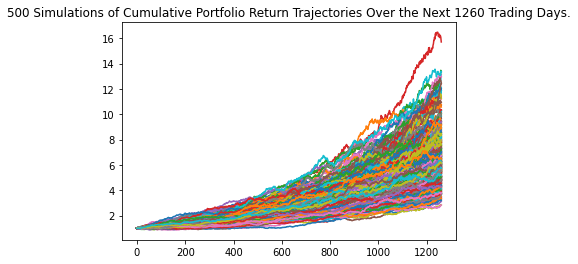

In [20]:
# Plot simulation outcomes
line_plot = MC_fiveyear.plot_simulation()

# Save the plot for future usage
line_plot.get_figure().savefig("MC_fiveyear_sim_plot.png", bbox_inches='tight')

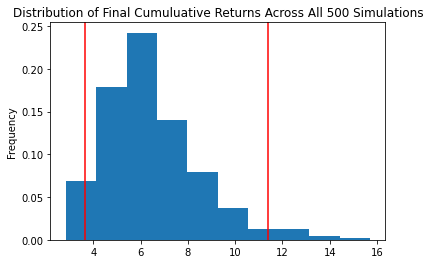

In [21]:
# Plot probability distribution and confidence intervals
dist_plot = MC_fiveyear.plot_distribution()

# Save the plot for future usage
dist_plot.get_figure().savefig('MC_fiveyear_dist_plot.png', bbox_inches='tight')

In [22]:
# Fetch summary statistics from the Monte Carlo simulation results
summary = MC_fiveyear.summarize_cumulative_return()

# Print summary statistics
print(summary)

count           500.000000
mean              6.434205
std               1.988670
min               2.823767
25%               5.043616
50%               6.044619
75%               7.526677
max              15.706939
95% CI Lower      3.651025
95% CI Upper     11.391918
Name: 1260, dtype: float64


In [23]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments in Coca-Cola and Microsoft stocks
ci_lower = round(summary[8] * 10000, 2)
ci_upper = round(summary[9] * 10000, 2)

# Print results
print(f"There is 95% probability that an intial investment of $10,000 \n"
      f"over the next 5 years will amount to somewhere between ${ci_lower} and \n"
      f"${ci_upper}. ")

There is 95% probability that an intial investment of $10,000 
over the next 5 years will amount to somewhere between $36510.25 and 
$113919.18. 
